# ARIMA aplicado na serie temporal 01
## Cotacao do Dolar em relacao ao Real

In [1]:
import pandas as pd
import numpy as np
import warnings

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

# imports de modulos que estao definidos dentro do projeto
import data
import timeseries
import arima
import constants

import matplotlib.pyplot as plt
%matplotlib inline

## Transformacao da serie temporal 'MENSAL com duas amostras'

In [2]:
df_monthly2 = data.load_timeseries01_monthly2()
#timeseries.plot_timeserie(df_monthly2)

In [3]:
ts_transform = timeseries.ts_transform1(df_monthly2)
#timeseries.plot_timeserie(ts_transform['ts_log']) # primeira transformacao
#timeseries.plot_timeserie(ts_transform['ts_log_diff']) # segunda transformacao

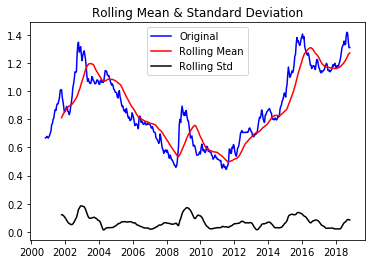

Results of Dickey-Fuller Test:
[FALHA] Test Statistic (-1.349799) > Critical Value 1 (-3.445685)
[FALHA] Test Statistic (-1.349799) > Critical Value 5 (-2.868301)
[FALHA] Test Statistic (-1.349799) > Critical Value 10 (-2.570371)
[FALHA] p-value (0.606093) > 0.05


In [4]:
timeseries.check_stationarity(ts_transform['ts_log'], window=24)

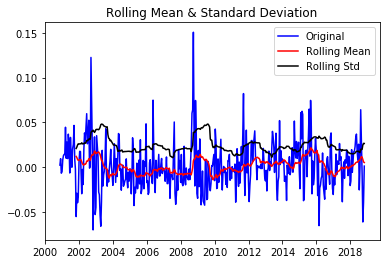

Results of Dickey-Fuller Test:
[SUCESSO] Test Statistic (-9.462374) < Critical Value 1 (-3.445685)
[SUCESSO] Test Statistic (-9.462374) < Critical Value 5 (-2.868301)
[SUCESSO] Test Statistic (-9.462374) < Critical Value 10 (-2.570371)
[SUCESSO] p-value (0.000000) < 0.05


In [5]:
timeseries.check_stationarity(ts_transform['ts_log_diff'], window=24)

## ARIMA aplicado na serie temporal 'MENSAL com duas amostras'

Parameter 'dataset' length:  433
Dataset 'train' length:  324
Dataset 'test' length:  109


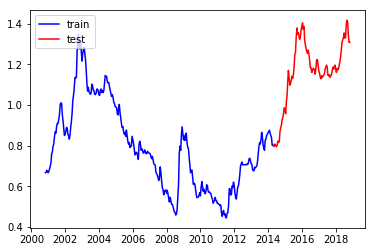

In [6]:
train, test = arima.split_dataset(ts_transform['ts_log'], porcentagem=constants.PORCENTAGEM, debug=True)
timeseries.plot_train_and_test(train, test)

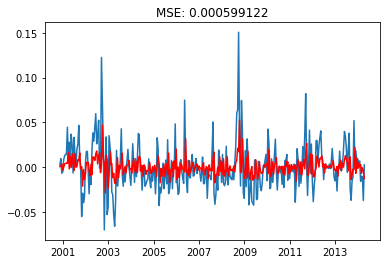

In [7]:
# melhores parametros encontrados no Grid Search
arima_params = (0, 1, 1)

model = ARIMA(train, order=arima_params)
results_ARIMA = model.fit(disp=-1)

train_size = int(len(ts_transform['ts_log_diff']) * constants.PORCENTAGEM)
ts_train = ts_transform['ts_log_diff'][0:train_size-1]

timeseries.plot_train_and_arima(ts_train, results_ARIMA)

                rate
date                
2000-11-15  1.952733
2000-11-30  1.971147
2000-12-15  1.957750
2000-12-31  1.947667
2001-01-15  1.963781
2001-01-31  1.989300
2001-02-15  2.017923
2001-02-28  2.046367
2001-03-15  2.139531
2001-03-31  2.160680
2001-04-15  2.221800
2001-04-30  2.242967
2001-05-15  2.327062
2001-05-31  2.383667
2001-06-15  2.367967
2001-06-30  2.447867
2001-07-15  2.483750
2001-07-31  2.483333
2001-08-15  2.533781
2001-08-31  2.599000
2001-09-15  2.722933
2001-09-30  2.747600
2001-10-15  2.741906
2001-10-31  2.594333
2001-11-15  2.519567
2001-11-30  2.421187
2001-12-15  2.340750
2001-12-31  2.352567
2002-01-15  2.394344
2002-01-31  2.436387
...              ...
2013-01-31  1.976300
2013-02-15  1.968115
2013-02-28  1.966007
2013-03-15  2.001431
2013-03-31  1.993767
2013-04-15  2.005407
2013-04-30  2.011587
2013-05-15  2.050506
2013-05-31  2.133933
2013-06-15  2.207547
2013-06-30  2.256860
2013-07-15  2.243338
2013-07-31  2.288787
2013-08-15  2.377131
2013-08-31  2

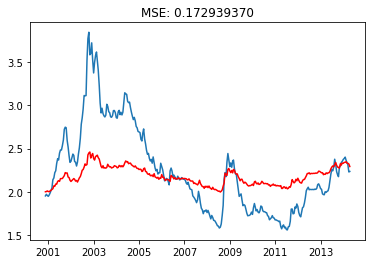

In [9]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(train.iloc[0], index=train.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)

predictions_ARIMA = np.exp(predictions_ARIMA_log)
predictions_ARIMA = predictions_ARIMA.apply(lambda x: x*2.0)
predictions_ARIMA = predictions_ARIMA[1:]
#print(len(predictions_ARIMA))
#print(predictions_ARIMA)

train_size = int(len(df_monthly2) * constants.PORCENTAGEM)
ts_train = df_monthly2[1:train_size]
#print(len(ts_train))
print(ts_train)

timeseries.plot_train_and_predictions(ts_train, predictions_ARIMA)

In [ ]:
predictions = list()
historical = list()

model = ARIMA(train, order=arima_params)
model_fit = model.fit(disp=0)

t = 0
for yhat in forecast:
    predicted = np.exp(float(yhat))
    predictions.append(predicted)
    
    observed =  np.exp(test['rate'][t])
    historical.append(observed)
    print('Predicted = %.9f, Expected = %.9f' % (predicted, observed))
    t += 1

error = mean_squared_error(historical, predictions)
print('Test MSE: %.9f' % error)

plt.plot(historical)
plt.plot(predictions, color='red')
plt.show()

## Transformacao da serie temporal 'MENSAL'

In [ ]:
df_monthly = data.load_timeseries01_monthly()
#timeseries.plot_timeserie(df_monthly)

In [ ]:
ts_transform = timeseries.ts_transform1(df_monthly)
timeseries.plot_timeserie(ts_transform['ts_log'])

In [ ]:
timeseries.check_stationarity(ts_transform['ts_log'], window=12)

In [ ]:
timeseries.plot_timeserie(ts_transform['ts_log_diff'])

In [ ]:
timeseries.check_stationarity(ts_transform['ts_log_diff'], window=12)

## ARIMA aplicado na serie temporal 'MENSAL'

In [ ]:
# teste com 150 combinacoes de parametros
# melhores parametros encontrados no Grid Search
# Melhores parametros: ARIMA(0, 1, 1) MSE=0.001153267
arima_params = (0, 1, 1)